Pre-algoritmo

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [28]:
# Matriz M.

# (No se queda este párrafo)
# Importar M desde Excel.
# Se cargan los datos de la matriz inicial de un archivo Excel.
# Lee el archivo Excel y devuelve un DataFrame de pandas.
# Matriz definida previamente con 5 filas (países) y 15 columnas (productos). 
# df = pd.read_excel('datos.xlsx', header=None)
# Convierte el DataFrame en un array de NumPy, formato matricial.
# M = df.to_numpy()
# Se obtienen las dimensiones de la matriz.
# c, p = M.shape

# Generar M, matriz anidada.
#c = 10
#p = 100
#M = np.zeros((c, p))
#o = 0
#h = int(p/c)+1
#for i in range(c):
#    for j in range(p-o):
#        M[i, j] = 1
#    o = o + h -1

# Importar la matriz desde un archivo CSV
# Convertimos la matriz M en un array de NumPy.
file_path = 'M_PL_055.csv'
with open(file_path, newline='') as csvfile:
    reader = csv.reader(csvfile)
    M = list(reader)
    M = np.array([row[1:] for row in M[1:]], dtype=float)  # Excluimos la primera fila y el primer elemento de cada fila
# Se obtienen las dimensiones de la matriz.
c, p = M.shape

# (No se queda este párrafo)
# Matriz M aleatoria. 
# Se evita la reproducibilidad (datos iniciales distintos cada vez que se ejecute):
#np.random.seed()
# Tamaño de la matriz inicial.
#c = 5 # Número de países/filas.
#p = 5 # Número de productos/columnas.
#peso = 2 # Matriz con valores aleatorios entre 0 y peso-1.
#M = np.random.randint(peso, size=(c, p))

# Si, al final, se quiere representar ln(F), logaritmo = 1, si no, logaritmo != 1.
logaritmo = 1

# (No se queda este párrafo)
#print("Número de países: {}".format(c))
#print("Número de productos: {}".format(p))

Notación

A^{n}: Vector de la variable A en la iteración n.
Ag^{n}: Vector de la variable no normalizada A en la iteración n. (Variable intemedia de iteración).
B_c^{n}: Componente c de la variable B en la iteración n.

Declaración de variables
F: Vector de la Competitividad normalizada.
Q: Vector de la Complejidad normalizadas.
F_valores: Matriz que guarda los valores de F en cada iteración.
Q_valores: Matriz que guarda los valores de Q en cada iteración.

Consideraciones sobre las Condiciones iniciales:
Para el paso previo de calcular Fg^{n} y Qg^{n}, es necesario haber normalizado F^{n-1} y Q^{n-1}. 
Se toma A^{n} = 0 para el caso de Ag^{n-1} = 0.
Esto implica que las condiciones iniciales se imponen sólo para Fg^{0} y Qg^{0} y no se definen para F^{0} y Q^{0}.

Para calcular las variables intermedias Fg^{1} y Qg^{1}, se calculan primero F^{0} y Q^{0}.
F^{0} y Q^{0} están normalizadas, por lo tanto da igual los valores exactos de Fg^{0} y Qg^{0}, es decir, no afectan a la iteración. Sólo afectará si Fg^{0} o Qg^{0} es 0.
Es decir, es idéntico imponer unas condiciones aleatorias a Fg^{0} y Qg^{0} que imponer condiciones aleatorias con valores 0 o 1 a las mismas Fg^{0} y Qg^{0}.

In [29]:
#Condiciones iniciales.
# Se imponen condiciones iniciales para Fg y Qg.
CIartículo = 0 # 1: condiciones iniciales del Artículo; !=1: condiciones iniciales aleatorias con 0 y 1.
if CIartículo == 1:
    # Valores iniciales Fg y Qg = 1 para todo c y p.
    Fg = np.ones(c)
    Qg = np.ones(p)
else:
    # Valores iniciales de Fg y Qg aleatorios.
    Fg = np.random.randint(2, size=c)
    Qg = np.random.randint(2, size=p)

# Condiciones iniciales normalizadas.
F = Fg / np.mean(Fg)
Q = Qg / np.mean(Qg)

# Definimos el número de iteraciones.
n = 100

# Generamos la matriz que va a guardar los valores.
F_valores = np.zeros((n, c))
Q_valores = np.zeros((n, p))

In [30]:
for i in range(n):
    # 1) Cálculo de las variables intermedias:
    # 1.1) Cálculo de Fg en la iteración n:
    Fg = M.dot(Q)  #  donde Fg[c] = \sum_p M_{c,p} * Q[p]

    # 1.2) Cálculo de Qg en la iteración n:
    # vector 1/F
    invF = np.where(F != 0, 1.0 / F, 0) # donde invF[c] = 1 / F[c] si F[c] != 0, 0 si F[c] = 0
    # Para cada p, sum_c M_{c,p} * (1/F[c]). Usamos la multiplicación de matriz traspuesta y hayamos 1/Q[p].
    invQ = M.T.dot(invF)
    Qg = np.where(invQ != 0, 1.0 / invQ, 0) # donde Qg[p] = 1 / \sum_c ( M_{c,p} / F_c^{(n-1)} )
    
    # 3) Guardar los valores de F y Q en cada iteración para su posterior análisis/representación.
    F_valores[i, :] = F
    Q_valores[i, :] = Q

    # 4) Normalización de y actualización de F y Q para la siguiente iteración.
    F = Fg / np.mean(Fg)
    Q = Qg / np.mean(Qg)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_12708\3836390569.py:8: RuntimeWarning: divide by zero encountered in divide
  invF = np.where(F != 0, 1.0 / F, 0) # donde invF[c] = 1 / F[c] si F[c] != 0, 0 si F[c] = 0
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_12708\3836390569.py:11: RuntimeWarning: divide by zero encountered in divide
  Qg = np.where(invQ != 0, 1.0 / invQ, 0) # donde Qg[p] = 1 / \sum_c ( M_{c,p} / F_c^{(n-1)} )


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_12708\3832063889.py:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(range(n), np.log(F_valores[:, j]))
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_12708\3832063889.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


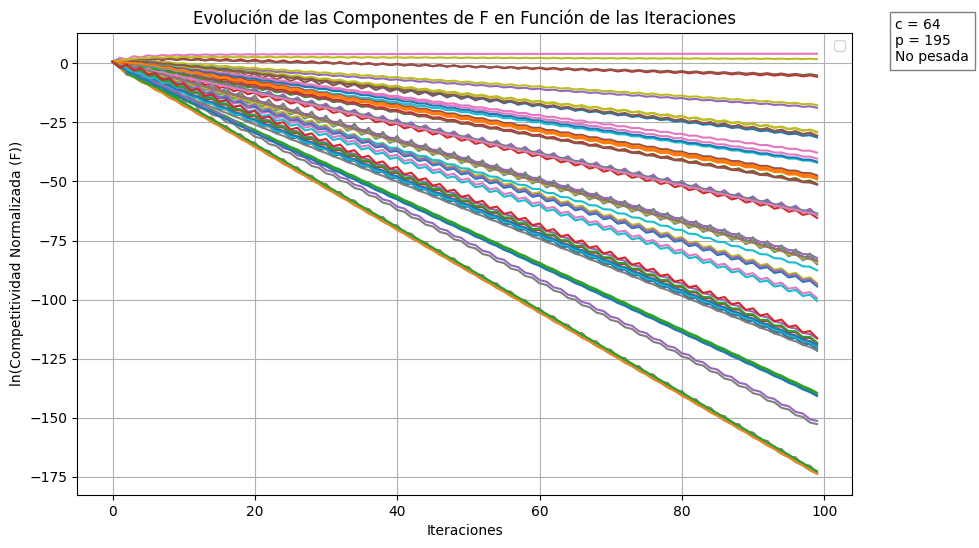

Matriz M:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]

F:
[4.77162352e-37 3.78821259e-53 1.08133672e-22 3.04932439e-52
 1.37713880e-36 2.62584836e-53 3.01638030e-18 3.02592134e-76
 6.94973895e-41 3.52058808e-37 2.90085830e-53 3.02592134e-76
 1.84210762e-28 5.29729090e-03 8.38126106e-09 9.84748609e-14
 1.20945995e-43 3.02592134e-76 3.40043729e-13 5.03675353e-77
 3.14387271e-14 2.51188307e-37 8.71313970e-62 7.46644843e-29
 5.03584912e-28 2.47655864e-21 9.16366718e-29 2.11334094e-36
 3.32290896e-37 7.51695868e-39 1.73485716e-41 5.03675353e-77
 1.51102606e-76 6.29574716e-23 3.47197775e-41 4.43823769e-23
 4.02205897e-17 4.45375506e-68 2.50476144e-08 4.67698190e-53
 7.88263966e-53 6.76599254e-22 9.16369897e-29 2.20942169e-37
 1.52247277e-51 8.53824450e-03 5.70963243e+01 6.63285266e-54
 3.23017440e-13 5.48242489e-19 8.55614690e-19 4.91934236e-22
 4.35656973e-62 1.32583790e-21 1.7815

In [31]:
# Representar la evolución de las componentes de F en función de las iteraciones
plt.figure(figsize=(10, 6))
if logaritmo == 1: # Representación en escala logarítmica.
    for j in range(c):
        plt.plot(range(n), np.log(F_valores[:, j]))
    plt.ylabel('ln(Competitividad Normalizada (F))')
else:
    for j in range(c):
        plt.plot(range(n), F_valores[:, j])
    plt.ylabel('Competitividad Normalizada (F)')

plt.xlabel('Iteraciones')
plt.title('Evolución de las Componentes de F en Función de las Iteraciones')

# Cartel con el tipo de M utilizada.
plt.text(110, logaritmo, f"c = {c}\np = {p}\nNo pesada", bbox=dict(facecolor="white", alpha=0.5))

plt.legend()
plt.grid(True)
plt.show()

# (No se queda este párrafo)
# Exportamos los datos a Excel
# df = pd.DataFrame(F)
# df.to_excel('Resultados.xlsx', sheet_name='Países', index=False)
# df = pd.DataFrame(Q)
# Abre el archivo existente y agrega una nueva hoja
# with pd.ExcelWriter('Resultados.xlsx', engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    # df.to_excel(writer, sheet_name='Productos', index=False)

# Resultados finales
print("Matriz M:")
print(M)
print("\nF:")
print(F)
print("\nQ:")
print(Q)